In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

/var/folders/9f/d0blkdy107j9w989n_kd85l40000gn/T/ipykernel_51063/194664824.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [6]:
data = pd.read_csv('MLS.csv')

In [7]:
data['Date'] = pd.to_datetime(data['Date'])
minDate = data['Date'].min()
data['MonthsElapsed'] = ((data['Date'] - minDate) / np.timedelta64(1, 'm')).astype(int)

In [8]:
# now let's define a feature set
features = ['CompIndex', 'CompYoYChange', 'SFDetachIndex', 'SFDetachBenchmark', 'SFDetachYoYChange', 'SFAttachIndex', 'SFAttachBenchmark', 'MonthsElapsed']
target = 'CompBenchmark'
# clean up the data, get rid of incomplete rows
data_clean = data.dropna(subset=[target] + features)

X = data_clean[features]
y = data_clean[target]

# 20% for test, 80% for training, and for simplicity, we are doing the same sampling split every time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
# train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
# first predictions
y_pred = model.predict(X_test)

MSE: 9557013654.134556
R2: 0.8636315867543467


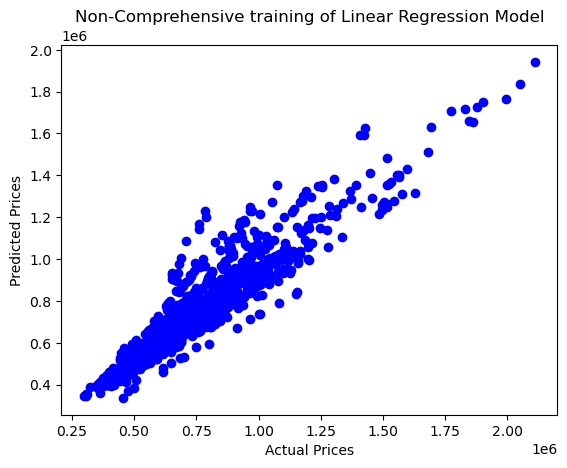

In [11]:
# model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}')
print(f'R2: {r2}')

plt.scatter(y_test, y_pred, color='blue')

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Non-Comprehensive training of Linear Regression Model')
plt.show()